## Chapter 14: Tree-based learners

# 14.1  Stumps and trees

- In Section 11.1 we saw the simplest, and perhaps most popular, exemplar of a tree-based learner: the *stump*

- In this brief Section see how general tree-based learners are defined recursively in terms of the basic notion of a stump

In [4]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import math_optimization_library as optlib

from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

static_plotter = optlib.static_plotter.Visualizer()
regress_plotter = nonlib.nonlinear_regression_demos


# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# plotting
import matplotlib.pyplot as plt
import copy

%load_ext autoreload
%autoreload 2

## 14.1.1  Tree-based universal approximators 

In Section 11.1 we learned about a basic exemplar of the tree-based universal approximators: the stump.  The stump or a *tree of depth one*, a simple *discrete step function*, consists of a two levels or *leaves* (which can be set independently) and a split-point defining a linear boundary between the two levels (often called *leaves* of the tree).  This split-point separates the two levels linearly *along a single input axis only*, as illustrated in the Figure below.  This makes the stump function an especially simple step with *three parameters*: a split-point and two leaf values.

<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth1.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 1:</strong> <em> 
An illustration of a *stump* function from the family of tree-based universal approimators.  Here $V_1$ is called the *split-point* and $y_1$ / $y_2$ the *leaves* of the function.  ADD VERSION IN 3D.
</em>
</figcaption>
</figure>

To create a more flexible decision tree-based units we simply split each leaf of the stump *along a single-input axis*, introducing two new split points and creating a unit with *four* discrete leaves.  This gives us a *tree of depth two* which has $7$ parameters ($3$ split-points and $4$ leaf values).  Such a depth two tree unit is illustrated both algebraically and graphically in the Figure below.


<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth2.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 2:</strong> <em> 
An illustration of a depth two tree function from the family of tree-based universal approimators.  Here $V_1$, $V_2$, and $V_3$ are called *split-points* and $y_1$ / $y_2$ / $y_3$ / $y_4$ the *levels* of the function.  CHANGE NOTATION TO $s_j$ FOR SPLIT, $v_j$ FOR LEAF.  ADD 3D PANEL.
</em>
</figcaption>
</figure>

Conceptually speaking, to build deeper trees we can either *recurse* and split up each leaf of a stump, or we can *add three* stumps together, as illustrated figuratively below.


<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth2.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 3:</strong> <em> 
To construct a depth two (left panel) we can either (middle panel) recurse and split up each leaf of a stump (each one becoming a miniture stump itself) or (right panel) add two stumps together.  CHANGE NOTATION TO $s_j$ FOR SPLIT, $v_j$ FOR LEAF.  ADD 3D PANEL.
</em>
</figcaption>
</figure>

This added flexibility provides a depth two unit provides significantly greater capacity than its stump relative, since the location of the split points and values set to the levels can be set in many ways.  Below we illustrate $4$ instances of a single-input depth two tree.  Note here that for visualization purposes the leaves of each tree are connected by vertical lines, which is commonly done when visualizing tree-based units.

<IPython.core.display.Javascript object>


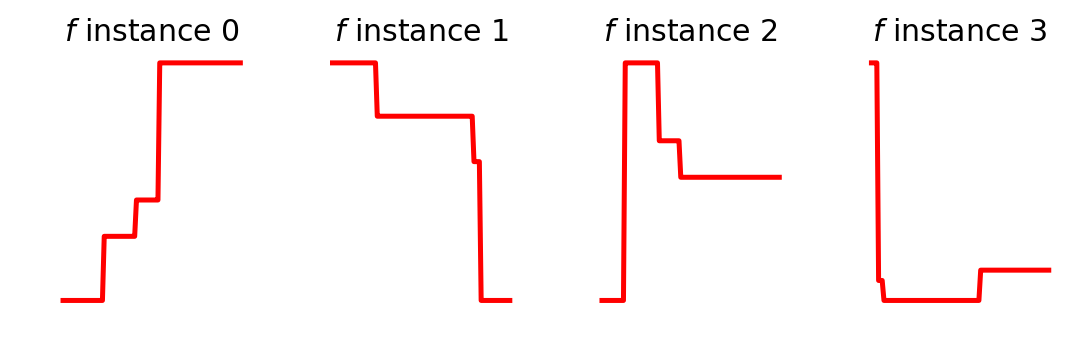

In [5]:
## This code cell will not be shown in the HTML version of this notebook
def build_stump(s,L1,L2,x):
    stump = []
    for pt in x:
        if pt < s:
            stump.append(L1)
        else:
            stump.append(L2)
    stump = np.array(stump).flatten()
    return stump

def build_random_tree(D):    
    # input space
    x = np.linspace(0,1,100)
    
    # build tree
    fm = np.zeros((100,1)).flatten()
    for d in range(D):
        # make stump element
        s = np.random.rand(1)
        L1 = np.random.randn(1)
        L2 = np.random.randn(1)
        new = build_stump(s,L1,L2,x)
        
        # add to current
        fm += new
    return fm

def plot_trees(D,num_instances):
    # figure
    fig = plt.figure(figsize = (9,3))
    x = np.linspace(0,1,100)

    # loop over and create instances
    for n in range(num_instances):
        # create tree 
        fm = build_random_tree(D)
        
        # plot the current element
        ax = fig.add_subplot(1,num_instances,n+1)
        ax.plot(x,fm,c='r',zorder = 3,linewidth = 3)
        ax.set_title('$f$ instance ' + str(n),fontsize = 18)

        # clean up plot
        ax.grid(True, which='both')
        #ax.axhline(y=0, color='k')
        #ax.axvline(x=0, color='k')
        ax.axis('off')
    plt.show()
    
# use plotting tool
D = 2
num_stumps = D + 1
num_instances = 4
plot_trees(num_stumps,num_instances)

A depth $D$ tree generalizes directly from the cases above, having $2D - 1$ split-points and $2^D$ leaves (and thus $2D - 1 + 2^D$ parameters).  It can likewise be built by *recursiving* on the notion of a stump $D$ times, or by adding together $D + 1$ stumps together.  The deeper a tree becomes the higher the capacity each unit has, being able to take on a wider variety of shapes.  For example, below we illustrate $4$ random instances of a depth $10$ tree.  

<IPython.core.display.Javascript object>


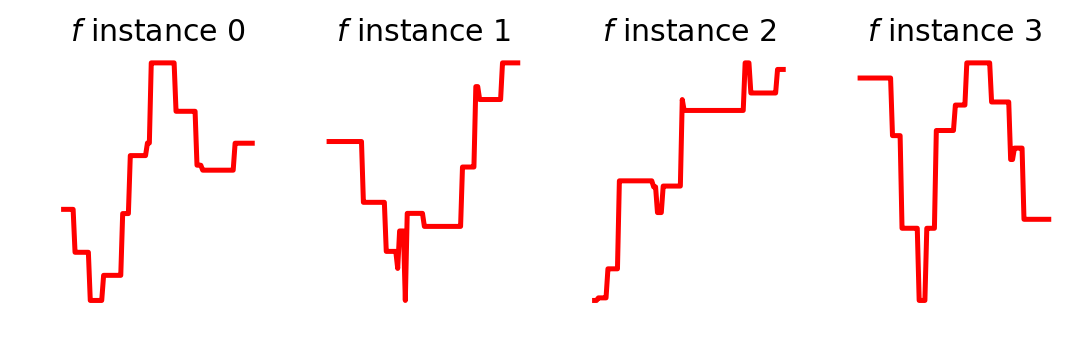

In [7]:
# use plotting tool
D = 10
num_stumps = D + 1
num_instances = 4
plot_trees(num_stumps,num_instances)

## 14.1.2 Two ways to parameterize a stump

## 14.1.3  Interpreting trees 